<a href="https://colab.research.google.com/github/rajat98v/Sign-Language-Recognition/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To download dataset from Kaggle
## Get API Token
1. Make Kaggle Account at https://kaggle.com
2. Go to Profile -> Accounts -> API -> Click Create New API Token
3. Download the kaggle.json file 


Install Kaggle API

In [1]:
 ! pip install -q kaggle

Upload the kaggle.json file to colab

In [2]:
 from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajat98v","key":"3bd74e6f20262cf73f5ed4f5c6ba5bf5"}'}

Create Config file directory for kaggle & upload kaggle.json (TOKEN).

In [4]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list  # List all the datasets available

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55           1686  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           3974  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           1901  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           7592  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

#### Download Asl-alphabet database
https://www.kaggle.com/grassknoted/asl-alphabet

In [5]:
! kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

100% 2.10G/2.11G [00:24<00:00, 71.1MB/s]
100% 2.11G/2.11G [00:24<00:00, 90.7MB/s]


In [6]:
! unzip asl-rgb-depth-fingerspelling-spelling-it-out.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset5/E/u/color_20_0231.png  
  inflating: dataset5/E/u/color_20_0232.png  
  inflating: dataset5/E/u/color_20_0233.png  
  inflating: dataset5/E/u/color_20_0234.png  
  inflating: dataset5/E/u/color_20_0235.png  
  inflating: dataset5/E/u/color_20_0236.png  
  inflating: dataset5/E/u/color_20_0237.png  
  inflating: dataset5/E/u/color_20_0238.png  
  inflating: dataset5/E/u/color_20_0239.png  
  inflating: dataset5/E/u/color_20_0240.png  
  inflating: dataset5/E/u/color_20_0241.png  
  inflating: dataset5/E/u/color_20_0242.png  
  inflating: dataset5/E/u/color_20_0243.png  
  inflating: dataset5/E/u/color_20_0244.png  
  inflating: dataset5/E/u/color_20_0245.png  
  inflating: dataset5/E/u/color_20_0246.png  
  inflating: dataset5/E/u/color_20_0247.png  
  inflating: dataset5/E/u/color_20_0248.png  
  inflating: dataset5/E/u/color_20_0249.png  
  inflating: dataset5/E/u/color_20_0250.png  
  inflating: dataset5/E/u/col

In [ ]:
! kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:07<00:00, 214MB/s]
100% 1.03G/1.03G [00:08<00:00, 137MB/s]


In [ ]:
!pwd  # all the shell command is executing under this directory by default

/content


In [ ]:
!unzip asl-alphabet.zip # unzip the database

# Resourse
## Code
- https://www.kaggle.com/serkanpeldek/cnn-practices-on-sign-language-digits (64X64)

## Dataset
- https://www.kaggle.com/grassknoted/asl-alphabet (200X200)

The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.

In [39]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(215, activation='relu'), 
    
    tf.keras.layers.Dense(24, activation='softmax') 
])


In [ ]:
model.summary()

In [28]:

data_dir = "/content/dataset5/A"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 200),
  batch_size=32)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

class_names = train_ds.class_names
print(class_names)



Found 25118 files belonging to 24 classes.
Using 20095 files for training.
Found 25118 files belonging to 24 classes.
Using 5023 files for validation.
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 0.04705883


In [36]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_steps=50,
                              verbose=1)

Epoch 1/20


InvalidArgumentError: ignored

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
628/628 [==============================] - 64s 101ms/step - loss: 3.3847 - accuracy: 0.0400 - val_loss: 3.3785 - val_accuracy: 0.0464
Epoch 2/10
414/628 [==================>...........] - ETA: 19s - loss: 3.3828 - accuracy: 0.0420

KeyboardInterrupt: ignored

In [41]:
# Donot run
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/content/dataset5/A"
image_generator = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = image_generator.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=126
)

validation_generator = image_generator.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical',
  batch_size=126
)

Found 25118 images belonging to 24 classes.
Found 25118 images belonging to 24 classes.


In [42]:
# DONt
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
#DONT
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=6,
                              validation_steps=50,
                              verbose=1)

Epoch 1/6
100/100 [==============================] - 29s 290ms/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.0270 - val_accuracy: 0.9922
Epoch 2/6
100/100 [==============================] - 29s 289ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0191 - val_accuracy: 0.9951
Epoch 3/6
100/100 [==============================] - 29s 287ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0118 - val_accuracy: 0.9963
Epoch 4/6
100/100 [==============================] - 29s 285ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 5/6
100/100 [==============================] - 29s 288ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0110 - val_accuracy: 0.9962
Epoch 6/6
100/100 [==============================] - 29s 286ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.0247 - val_accuracy: 0.9929


In [47]:
model.save('/contents')


INFO:tensorflow:Assets written to: /contents/assets


In [ ]:
! pwd
! cd assets


/content


In [ ]:
! ls -l

total 1075320
drwxr-xr-x 3 root root       4096 Dec 12 14:21 asl_alphabet_test
drwxr-xr-x 3 root root       4096 Dec 12 14:21 asl_alphabet_train
-rw-r--r-- 1 root root 1100887034 Dec 12 14:21 asl-alphabet.zip
drwxr-xr-x 2 root root       4096 Dec 12 14:33 assets
-rw-r--r-- 1 root root         64 Dec 12 14:20 kaggle.json
drwxr-xr-x 1 root root       4096 Dec  2 22:04 sample_data
-rw-r--r-- 1 root root     205961 Dec 12 14:33 saved_model.pb
drwxr-xr-x 2 root root       4096 Dec 12 14:33 variables


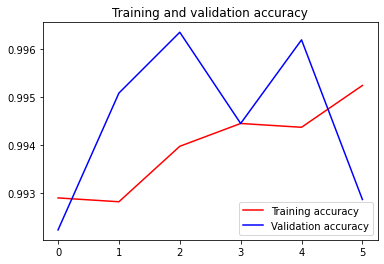

<Figure size 432x288 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [56]:


import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)



Saving photo.jpg to photo (1).jpg
photo.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [54]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


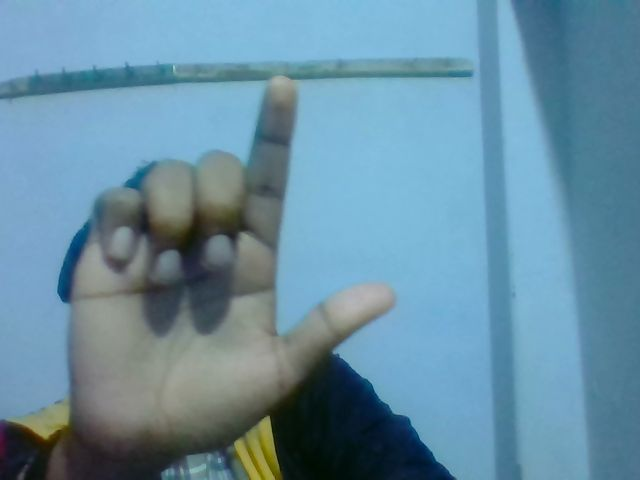

In [55]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))